In [1]:
import random
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import json

In [2]:
# Define constants
NUM_EMPLOYEES = 2000
NUM_MENTORS = 7
SKILLS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
DEPARTMENTS = ["DSG",  "LSG", "MOC", "TSG", "OOC", "QCC", "EDS", "SSG", "POC", "CLV", "OM Detention & Demurrage Management", "HR"]
GOALS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
INTERESTS = ["Sports", "Reading", "Traveling", "Cooking"]

# Function to generate a random Vietnamese phone number
def generate_phone_number():
    prefixes = ["09", "05", "03"]
    return random.choice(prefixes) + ''.join([str(random.randint(0, 9)) for _ in range(8)])

# Helper function to generate Vietnamese names
def generate_vietnamese_name():
    first_names = ["Anh", "Binh", "Cuong", "Dung", "Hanh", "Huy", "Linh", "Minh", "Ngan", "Phat", "Quang", "Tu", "Trang"]
    last_names = ["Nguyen", "Tran", "Le", "Pham", "Huynh", "Hoang", "Dang", "Bui", "Vu", "Do"]
    return f"{random.choice(last_names)} {random.choice(first_names)}"

# Define the specific mentor names
mentor_names = ["Khoa Nguyen", "Dat Tran", "Thi Huynh", "My Nguyen", "Phu Nguyen", "Chau Tran", "Phat Vo"]

# Define mentor-specific skills and departments
mentor_skills_and_departments = {
    "Khoa Nguyen": {"skills": ["Python", "Leadership", "Time Management", "Data Analysis"], "Department": "SSG"},
    "Dat Tran": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"},
    "Thi Huynh": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "My Nguyen": {"skills": ["Project Management", "Public Speaking", "Teamwork", "Creative Thinking"], "Department": "OM Detention & Demurrage Management"},
    "Phu Nguyen": {"skills": ["UI/UX Design", "Time Management"], "Department": "OM Detention & Demurrage Management"},
    "Chau Tran": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "Phat Vo": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"}
}

In [3]:
# Generate employee data (assuming this code block is provided by you)
employee_data = []
for i in range(NUM_EMPLOYEES):
    employee_data.append({
        "employeeID": f"{i+1:06d}",
        "name": generate_vietnamese_name(),
        "skills": random.sample(SKILLS, k=random.randint(3, 5)),
        "experience": random.randint(1, 10),
        "department": random.choice(DEPARTMENTS),
        "learningGoal": random.choice(GOALS),
        "availability": random.choice(["Flexible", "Specific hours"])
    })

employee_df = pd.DataFrame(employee_data)

# Add email columns
employee_df["email"] = [f"{name.split(' ')[-1].lower()}.{name.split(' ')[0].lower()}@cyberlogitec.com" for name in employee_df["name"]]

# Add "Interest" and "Phone Number" columns to employee_df
employee_df["interest"] = random.choices(INTERESTS, k=len(employee_df))
employee_df["phoneNumber"] = [generate_phone_number() for _ in range(len(employee_df))]

# Transform the DataFrame to match the JSON structure
employee_json_data = [
    {
        "employeeId": row["employeeID"],
        "fullName": row["name"],
        "skills": row["skills"],
        "experience": row["experience"],
        "department": row["department"],
        "learningGoal": row["learningGoal"],
        "availability": row["availability"],
        "email": row["email"],
        "interest": row["interest"],
        "phoneNumber": row["phoneNumber"]
    }
    for _, row in employee_df.iterrows()
]

# Save to JSON file
with open("employees.json", "w") as json_file:
    json.dump(employee_json_data, json_file, indent=4)

print("Employee data exported successfully!")


Employee data exported successfully!


In [4]:
employee_df.columns

Index(['employeeID', 'name', 'skills', 'experience', 'department',
       'learningGoal', 'availability', 'email', 'interest', 'phoneNumber'],
      dtype='object')

In [5]:
employee_df

,employeeID,name,skills,experience,department,learningGoal,availability,email,interest,phoneNumber
0,000001,Bui Dung,"[Marketing, Data Analysis, Creative Thinking]",6,OM Detention & Demurrage Management,UI/UX Design,Flexible,dung.bui@cyberlogitec.com,Traveling,0968044807
1,000002,Pham Quang,"[Marketing, Creative Thinking, Teamwork, UI/UX...",7,MOC,Creative Thinking,Specific hours,quang.pham@cyberlogitec.com,Sports,0972238971
2,000003,Vu Phat,"[Creative Thinking, Leadership, Python, Time M...",1,OOC,Java,Specific hours,phat.vu@cyberlogitec.com,Reading,0998497538
3,000004,Nguyen Tu,"[Public Speaking, Time Management, Data Analysis]",8,OOC,Project Management,Flexible,tu.nguyen@cyberlogitec.com,Cooking,0394149467
4,000005,Huynh Tu,"[Data Analysis, UI/UX Design, Java, Time Manag...",3,EDS,Data Analysis,Specific hours,tu.huynh@cyberlogitec.com,Sports,0978388748
...,...,...,...,...,...,...,...,...,...,...
1995,001996,Vu Linh,"[Python, Java, Marketing]",10,MOC,Marketing,Specific hours,linh.vu@cyberlogitec.com,Cooking,0315784052
1996,001997,Do Linh,"[Python, Data Analysis, Leadership]",7,LSG,Java,Specific hours,linh.do@cyberlogitec.com,Traveling,0323411832
1997,001998,Hoang Ngan,"[Marketing, UI/UX Design, Public Speaking, Dat...",9,EDS,Teamwork,Specific hours,ngan.hoang@cyberlogitec.com,Reading,0541359049
1998,001999,Pham Huy,"[UI/UX Design, Time Management, Python, Public...",1,QCC,Public Speaking,Flexible,huy.pham@cyberlogitec.com,Reading,0586829177


In [6]:
# Define constants
NUM_MENTORS = 300
SKILLS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
DEPARTMENTS = ["DSG", "LSG", "MOC", "TSG", "OOC", "QCC", "EDS", "SSG", "POC", "CLV", "OM Detention & Demurrage Management", "HR"]
INTERESTS = ["Sports", "Reading", "Traveling", "Cooking"]

# Function to generate a random Vietnamese phone number
def generate_phone_number():
    prefixes = ["09", "05", "03"]
    return random.choice(prefixes) + ''.join([str(random.randint(0, 9)) for _ in range(8)])

# Helper function to generate Vietnamese names
def generate_vietnamese_name():
    first_names = ["Anh", "Binh", "Cuong", "Dung", "Hanh", "Huy", "Linh", "Minh", "Ngan", "Phat", "Quang", "Tu", "Trang"]
    last_names = ["Nguyen", "Tran", "Le", "Pham", "Huynh", "Hoang", "Dang", "Bui", "Vu", "Do"]
    return f"{random.choice(last_names)} {random.choice(first_names)}"

# Define the specific mentor names and data
mentor_skills_and_departments = {
    "Khoa Nguyen": {"skills": ["Python", "Leadership", "Time Management", "Data Analysis"], "Department": "SSG"},
    "Dat Tran": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"},
    "Thi Huynh": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "My Nguyen": {"skills": ["Project Management", "Public Speaking", "Teamwork", "Creative Thinking"], "Department": "OM Detention & Demurrage Management"},
    "Phu Nguyen": {"skills": ["UI/UX Design", "Time Management"], "Department": "OM Detention & Demurrage Management"},
    "Chau Tran": {"skills": ["Creative Thinking", "Marketing", "Public Speaking", "Teamwork"], "Department": "OM Detention & Demurrage Management"},
    "Phat Vo": {"skills": ["Java", "Teamwork", "Project Management"], "Department": "CLV"}
}

# Generate mentor data for the fixed mentors
mentor_data = [
    {
        "mentorID": f"M{i+1:02d}",
        "name": name,
        "skills": details["skills"],
        "experience": random.randint(10, 30),
        "department": details["Department"],
        "mentoringCapacity": random.randint(1, 5),
        "preferredSkills": random.sample(SKILLS, k=random.randint(2, 4)),
        "availability": random.choice(["Flexible", "Specific hours"]),
        "email": f"{name.split(' ')[-1].lower()}.{name.split(' ')[0].lower()}@cyberlogitec.com",
        "interest": random.choice(INTERESTS),
        "phoneNumber": generate_phone_number()
    }
    for i, (name, details) in enumerate(mentor_skills_and_departments.items())
]

# Generate additional random mentor data for the remaining mentors (293)
additional_mentors_count = NUM_MENTORS - len(mentor_skills_and_departments)

# Generate additional mentor data
for i in range(additional_mentors_count):
    full_name = generate_vietnamese_name()  # Generate the name once and assign to full_name
    mentor_data.append({
        "mentorID": f"M{i+len(mentor_data)+1:03d}",
        "name": full_name,
        "skills": random.sample(SKILLS, k=random.randint(2, 5)),
        "experience": random.randint(10, 30),
        "department": random.choice(DEPARTMENTS),
        "mentoringCapacity": random.randint(1, 5),
        "preferredSkills": random.sample(SKILLS, k=random.randint(2, 4)),
        "availability": random.choice(["Flexible", "Specific hours"]),
        "email": f"{full_name.split()[1].lower()}.{full_name.split()[0].lower()}@cyberlogitec.com",  # Use full_name for email
        "interest": random.choice(INTERESTS),
        "phoneNumber": generate_phone_number()
    })

# Convert mentor data into a DataFrame
mentor_df = pd.DataFrame(mentor_data)

# Convert lists in 'skills' and 'preferredSkills' columns to string representations
# mentor_df['skills'] = mentor_df['skills'].apply(lambda x: ', '.join(sorted(x)))
# mentor_df['preferredSkills'] = mentor_df['preferredSkills'].apply(lambda x: ', '.join(sorted(x)))

# Remove duplicate rows from mentor_df
# mentor_df = mentor_df.drop_duplicates()

# Check if any duplicates were removed
# print(f"Number of rows after removing duplicates: {mentor_df.shape[0]}")

# Transform the mentor data into the desired JSON structure
mentor_json_data = mentor_df.to_dict(orient='records')

# Save mentor data to JSON file
with open("mentors.json", "w") as json_file:
    json.dump(mentor_json_data, json_file, indent=4)

print("Mentor data with 300 mentors exported successfully!")


Mentor data with 300 mentors exported successfully!


In [7]:
mentor_df

,mentorID,name,skills,experience,department,mentoringCapacity,preferredSkills,availability,email,interest,phoneNumber
0,M01,Khoa Nguyen,"[Python, Leadership, Time Management, Data Ana...",20,SSG,2,"[Teamwork, Project Management, Python, Data An...",Flexible,nguyen.khoa@cyberlogitec.com,Reading,0904700748
1,M02,Dat Tran,"[Java, Teamwork, Project Management]",24,CLV,5,"[Project Management, Public Speaking, Leadersh...",Specific hours,tran.dat@cyberlogitec.com,Cooking,0584521681
2,M03,Thi Huynh,"[Creative Thinking, Marketing, Public Speaking...",21,OM Detention & Demurrage Management,1,"[Public Speaking, Creative Thinking]",Flexible,huynh.thi@cyberlogitec.com,Reading,0521031824
3,M04,My Nguyen,"[Project Management, Public Speaking, Teamwork...",23,OM Detention & Demurrage Management,5,"[Java, Teamwork, Data Analysis, Creative Think...",Specific hours,nguyen.my@cyberlogitec.com,Sports,0938181019
4,M05,Phu Nguyen,"[UI/UX Design, Time Management]",14,OM Detention & Demurrage Management,1,"[Time Management, Marketing]",Flexible,nguyen.phu@cyberlogitec.com,Reading,0537789744
...,...,...,...,...,...,...,...,...,...,...,...
295,M584,Huynh Huy,"[Python, Public Speaking]",25,OM Detention & Demurrage Management,4,"[Project Management, Python, Public Speaking]",Flexible,huy.huynh@cyberlogitec.com,Sports,0379189812
296,M586,Tran Hanh,"[UI/UX Design, Project Management, Marketing, ...",28,TSG,2,"[Public Speaking, Teamwork, Creative Thinking]",Specific hours,hanh.tran@cyberlogitec.com,Reading,0560574068
297,M588,Le Trang,"[Marketing, Teamwork, Public Speaking, Python]",30,DSG,3,"[Public Speaking, Leadership]",Specific hours,trang.le@cyberlogitec.com,Cooking,0384185565
298,M590,Bui Hanh,"[Public Speaking, Project Management, Data Ana...",14,MOC,4,"[Project Management, Creative Thinking]",Flexible,hanh.bui@cyberlogitec.com,Cooking,0587392092


In [8]:
employee_df.columns

Index(['employeeID', 'name', 'skills', 'experience', 'department',
       'learningGoal', 'availability', 'email', 'interest', 'phoneNumber'],
      dtype='object')

In [9]:
mentor_df.columns

Index(['mentorID', 'name', 'skills', 'experience', 'department',
       'mentoringCapacity', 'preferredSkills', 'availability', 'email',
       'interest', 'phoneNumber'],
      dtype='object')

# Data Preprocessing

In [10]:
# --- Data Preparation ---

# Ensure EmployeeID and MentorID are properly formatted with leading zeros
employee_df['employeeID'] = employee_df.index.map(lambda x: f"{int(x):06d}")
mentor_df['mentorID'] = mentor_df.index.map(lambda x: f"{int(x):06d}")

# Ensure EmployeeID and MentorID are unique identifiers
employee_df.set_index('employeeID', inplace=True)
mentor_df.set_index('mentorID', inplace=True)

# Convert Skills to sets for easier calculations
employee_df['skills'] = employee_df['skills'].apply(set)
mentor_df['skills'] = mentor_df['skills'].apply(set)

# Convert Skills into binary features using MultiLabelBinarizer
all_skills = list(set.union(*employee_df['skills'], *mentor_df['skills']))  # Unique list of all skills
mlb_skills = MultiLabelBinarizer(classes=all_skills)

# Binary encoding for employee and mentor skills
employee_skills_encoded = pd.DataFrame(
    mlb_skills.fit_transform(employee_df['skills']),
    index=employee_df.index,
    columns=mlb_skills.classes_
)
mentor_skills_encoded = pd.DataFrame(
    mlb_skills.transform(mentor_df['skills']),
    index=mentor_df.index,
    columns=mlb_skills.classes_
)

# Concatenate encoded skills back to the original DataFrames
employee_df = pd.concat([employee_df, employee_skills_encoded], axis=1)
mentor_df = pd.concat([mentor_df, mentor_skills_encoded], axis=1)

# Normalize numerical features
scaler = MinMaxScaler()
employee_df[['experience']] = scaler.fit_transform(employee_df[['experience']])
mentor_df[['experience', 'mentoringCapacity']] = scaler.fit_transform(
    mentor_df[['experience', 'mentoringCapacity']]
)


## Matching algorithm

In [11]:
# Generate the Cartesian product of employee and mentor indices for efficient interaction simulation
interaction_list = []
for emp_id, mentor_id in product(employee_df.index, mentor_df.index):
    employee = employee_df.loc[emp_id]
    mentor = mentor_df.loc[mentor_id]

    # Skill similarity
    employee_skills = set(employee["skills"])
    mentor_skills = set(mentor["skills"])
    skill_overlap = len(employee_skills & mentor_skills)
    total_skills = len(employee_skills | mentor_skills)
    skill_similarity = skill_overlap / total_skills if total_skills else 0

    # Interest match
    interest_match = 1 if employee["interest"] == mentor["interest"] else 0

    # Experience difference
    experience_diff = abs(employee["experience"] - mentor["experience"])

    # Availability match
    availability_match = 1 if employee["availability"] == mentor["availability"] else 0

    # LearningGoal match
    learning_goal_match = 1 if employee["learningGoal"] in mentor["skills"] or employee["learningGoal"] in mentor["preferredSkills"] else 0

    # Add interaction data
    interaction_list.append({
        "employeeID": emp_id,
        "mentorID": mentor_id,
        "employeeName": employee["name"],  # Add employee name
        "mentorName": mentor["name"],      # Add mentor name
        "skillSimilarity": skill_similarity,
        "experienceDiff": experience_diff,
        "availabilityMatch": availability_match,
        "interestMatch": interest_match,
        "learningGoalMatch": learning_goal_match  # Add LearningGoalMatch
    })

# Convert interaction list to a DataFrame
interaction_df = pd.DataFrame(interaction_list)

# --- Feature Engineering ---
interaction_df['successLabel'] = (
    (interaction_df['skillSimilarity'] > 0.5) &
    (interaction_df['interestMatch'] == 1) &
    (interaction_df['learningGoalMatch'] == 1)  # Use LearningGoalMatch
).astype(int)

In [12]:
interaction_df

,employeeID,mentorID,employeeName,mentorName,skillSimilarity,experienceDiff,availabilityMatch,interestMatch,learningGoalMatch,successLabel
0,000000,000000,Bui Dung,Khoa Nguyen,0.166667,0.055556,1,0,0,0
1,000000,000001,Bui Dung,Dat Tran,0.000000,0.144444,0,0,0,0
2,000000,000002,Bui Dung,Thi Huynh,0.400000,0.005556,1,0,0,0
3,000000,000003,Bui Dung,My Nguyen,0.166667,0.094444,0,0,0,0
4,000000,000004,Bui Dung,Phu Nguyen,0.000000,0.355556,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
599995,001999,000295,Vu Huy,Huynh Huy,0.400000,0.083333,1,0,0,0
599996,001999,000296,Vu Huy,Tran Hanh,0.125000,0.233333,0,0,0,0
599997,001999,000297,Vu Huy,Le Trang,0.500000,0.333333,0,1,0,0
599998,001999,000298,Vu Huy,Bui Hanh,0.142857,0.466667,1,1,0,0


In [13]:
# Filter the rows where SuccessLabel is 1
successful_interactions = interaction_df[interaction_df['successLabel'] == 1]

# Print the filtered DataFrame
successful_interactions


,employeeID,mentorID,employeeName,mentorName,skillSimilarity,experienceDiff,availabilityMatch,interestMatch,learningGoalMatch,successLabel
72,000000,000072,Bui Dung,Huynh Quang,0.600000,0.505556,0,1,1,1
383,000001,000083,Pham Quang,Dang Tu,0.800000,0.416667,0,1,1,1
639,000002,000039,Vu Phat,Do Tu,0.600000,0.950000,1,1,1,1
801,000002,000201,Vu Phat,Do Cuong,0.600000,0.950000,1,1,1,1
838,000002,000238,Vu Phat,Hoang Ngan,0.666667,0.450000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
598958,001996,000158,Do Linh,Bui Hanh,0.600000,0.333333,0,1,1,1
599418,001998,000018,Pham Huy,Tran Cuong,0.600000,0.150000,1,1,1,1
599488,001998,000088,Pham Huy,Tran Dung,0.666667,0.200000,1,1,1,1
599562,001998,000162,Pham Huy,Do Ngan,0.800000,0.750000,0,1,1,1


In [14]:
# Ensure EmployeeID and MentorID in interaction_df are strings
interaction_df['employeeID'] = interaction_df['employeeID'].astype(str)
interaction_df['mentorID'] = interaction_df['mentorID'].astype(str)

# Ensure indices of employee_df and mentor_df are strings
employee_df.index = employee_df.index.astype(str)
mentor_df.index = mentor_df.index.astype(str)

# --- Interaction DataFrame Preparation ---
# Create SkillOverlap feature
interaction_df['skillOverlap'] = interaction_df.apply(
    lambda row: len(
        employee_df.loc[row['employeeID'], 'skills'] &
        mentor_df.loc[row['mentorID'], 'skills']
    )
    if row['employeeID'] in employee_df.index and row['mentorID'] in mentor_df.index else 0,
    axis=1
)

# Create ExperienceDiff feature
interaction_df['experienceDiff'] = interaction_df.apply(
    lambda row: abs(
        employee_df.loc[row['employeeID'], 'experience'] -
        mentor_df.loc[row['mentorID'], 'experience']
    )
    if row['employeeID'] in employee_df.index and row['mentorID'] in mentor_df.index else 0,
    axis=1
)


# Machine Learning - Supervised Learning

## Train a Supervised Model

In [17]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [18]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# --- Define Features and Target ---
X = interaction_df[[
    "skillSimilarity",
    "experienceDiff",
    "availabilityMatch",
    "interestMatch",
    "learningGoalMatch"
]]
y = interaction_df["successLabel"]

# --- Data Splitting ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Handle Class Imbalance ---
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# --- Define Objective Function for Optuna ---
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Define the model
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample"
    )

    # Train the model
    rf.fit(X_resampled, y_resampled)

    # Predict probabilities and calculate F1-score
    y_pred = rf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    return f1  # Return F1-score as the metric to optimize

# --- Run the Optuna Study ---
study = optuna.create_study(direction="maximize")  # Maximize F1-score
study.optimize(objective, n_trials=50)  # Run 50 trials

# --- Best Hyperparameters ---
print("Best Hyperparameters:", study.best_params)
print("Best F1-Score:", study.best_value)

# --- Train Final Model with Best Hyperparameters ---
best_params = study.best_params
best_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
best_model.fit(X_resampled, y_resampled)

# --- Evaluate Final Model ---
y_pred = best_model.predict(X_test)
print("Classification Report for Tuned Model:")
print(classification_report(y_test, y_pred))

# --- Save Mentor Recommendations ---
interaction_df["TunedSuccessProbability"] = best_model.predict_proba(X)[:, 1]
recommendations = (
    interaction_df.sort_values(by=["employeeID", "TunedSuccessProbability"], ascending=[True, False])
    .groupby("employeeID")
    .head(3)
)
recommendations = recommendations.merge(
    mentor_df.reset_index()[["mentorID", "name", "skills", "department"]],
    on="mentorID",
    how="left"
)

recommendation_json_data = recommendations.groupby("employeeID").apply(
    lambda group: [
        {
            "mentorID": row["mentorID"],
            "name": row["name"],
            "skills": list(row["skills"]) if isinstance(row["skills"], set) else row["skills"],
            "department": row["department"],
            "TunedSuccessProbability": row["TunedSuccessProbability"]
        }
        for _, row in group.iterrows()
    ]
).to_dict()

with open("mentor_recommendations.json", "w") as json_file:
    json.dump(recommendation_json_data, json_file, indent=4)

print("Mentor recommendations exported successfully!")


[I 2024-12-15 03:01:47,335] A new study created in memory with name: no-name-c12b71b4-2d37-4749-9ff5-3a8f08adec87
[I 2024-12-15 03:03:36,800] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 191, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 1.0.
[I 2024-12-15 03:04:16,944] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 70, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 1.0.
[I 2024-12-15 03:06:32,087] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 246, 'max_depth': 35, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 0 with value: 1.0.
[I 2024-12-15 03:06:58,840] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 53, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 1.0.
[I 2024-12-15 03:07:52,342] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 110, 'm

Best Hyperparameters: {'n_estimators': 191, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1}
Best F1-Score: 1.0
Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119452
           1       1.00      1.00      1.00       548

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

Mentor recommendations exported successfully!


<ipython-input-18-32cbde4b22bc>:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recommendation_json_data = recommendations.groupby("employeeID").apply(


# Evaluation

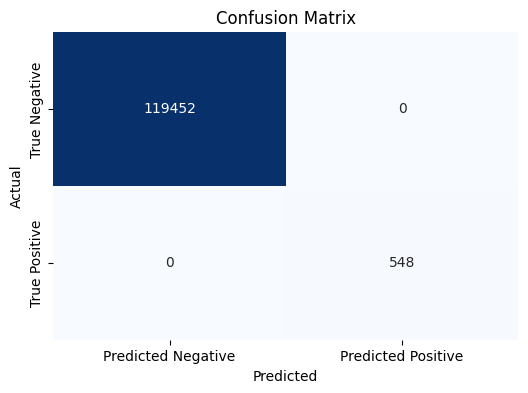

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report, confusion_matrix
# --- Generate and Plot Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame for better readability
cm_df = pd.DataFrame(cm, index=["True Negative", "True Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [21]:
import joblib
import json

# Save the trained model
joblib.dump(best_model, "tintor.pkl")
print("Model saved as 'tintor.pkl'.")

# Add a column for tuned success probability
interaction_df["TunedSuccessProbability"] = best_model.predict_proba(X)[:, 1]

# Rank mentors for each employee and select the top 3
recommendations = (
    interaction_df.groupby("employeeID", group_keys=False)
    .apply(lambda x: x.nlargest(3, "TunedSuccessProbability")[
        ["employeeID", "mentorID", "TunedSuccessProbability", "employeeName", "mentorName"]
    ])
)

# Convert the recommendations to a JSON format
recommendation_json = (
    recommendations.groupby("employeeID", group_keys=False)
    .apply(lambda x: x[["mentorID", "mentorName", "TunedSuccessProbability"]]
           .to_dict(orient="records"))
    .to_dict()
)

# Save the recommendations as a JSON file
with open("mentor_recommendations.json", "w") as json_file:
    json.dump(recommendation_json, json_file, indent=4)

print("Top 3 mentor recommendations for each employee saved to 'mentor_recommendations.json'.")


Model saved as 'tintor.pkl'.


<ipython-input-21-6e3a14a43475>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, "TunedSuccessProbability")[


Top 3 mentor recommendations for each employee saved to 'mentor_recommendations.json'.


<ipython-input-21-6e3a14a43475>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[["mentorID", "mentorName", "TunedSuccessProbability"]]


Threshold: 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119452
           1       1.00      1.00      1.00       548

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

Threshold: 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119452
           1       1.00      1.00      1.00       548

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

Threshold: 0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119452
           1       1.00      1.00      1.00       548

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      

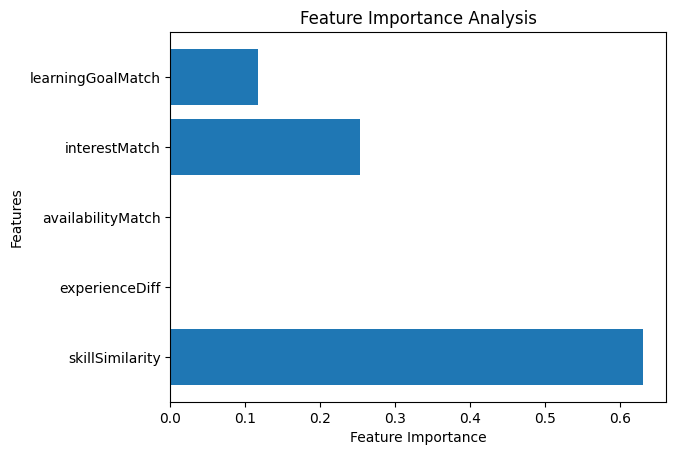

In [26]:
# --- Threshold Tuning ---
def evaluate_threshold(threshold):
    y_pred_threshold = (best_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))

# Evaluate multiple thresholds for better insights
thresholds = [0.3, 0.5, 0.7, 0.9]
for threshold in thresholds:
    evaluate_threshold(threshold)

# --- Feature Importance Analysis ---
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

# --- Add TunedSuccessProbability to interaction_df ---
interaction_df["TunedSuccessProbability"] = best_model.predict_proba(X)[:, 1]

# --- Mentor Recommendations ---
# Rank mentors for each employee based on TunedSuccessProbability
recommendations = (
    interaction_df.sort_values(by=["employeeID", "TunedSuccessProbability"], ascending=[True, False])
    .groupby("employeeID")
    .head(3)  # Select top 3 mentors for each employee
)

# Add mentor details to recommendations
recommendations = recommendations.merge(
    mentor_df.reset_index()[["mentorID", "name", "skills", "department"]],
    on="mentorID",
    how="left"
)

In [27]:
# Update predictions based on the optimal threshold
y_pred_threshold = (best_model.predict_proba(X_test)[:, 1] > 0.937720646367999).astype(int)

# Evaluate the updated model with the optimal threshold
from sklearn.metrics import classification_report, confusion_matrix

# Print the updated classification report
print("Classification Report for Tuned Model at Threshold 0.937720646367999:")
print(classification_report(y_test, y_pred_threshold))

# Print the updated confusion matrix
print("Confusion Matrix for Tuned Model at Threshold 0.937720646367999:")
print(confusion_matrix(y_test, y_pred_threshold))


Classification Report for Tuned Model at Threshold 0.937720646367999:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119452
           1       1.00      1.00      1.00       548

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000

Confusion Matrix for Tuned Model at Threshold 0.937720646367999:
[[119452      0]
 [     0    548]]


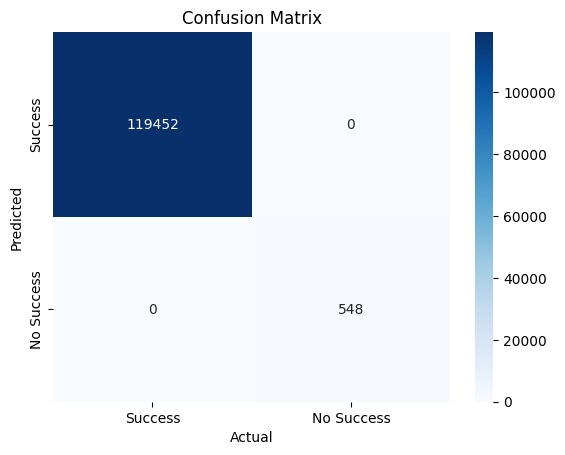

In [28]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Success', 'No Success'], yticklabels=['Success', 'No Success'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
recommendations.to_csv('mentor_recommendations.csv', index=False)

In [ ]:
# Add a column for tuned success probability
interaction_df["TunedSuccessProbability"] = best_model.predict_proba(X)[:, 1]

# Rank mentors for each employee and select the top 3
recommendations = (
    interaction_df.groupby("employeeID", group_keys=False)
    .apply(lambda x: x.nlargest(3, "TunedSuccessProbability")[[
        "employeeID", "mentorID", "TunedSuccessProbability", "employeeName", "mentorName"
    ]])
)

# Convert the recommendations to a JSON format
recommendation_json = (
    recommendations.groupby("employeeID", group_keys=False)
    .apply(lambda x: x[["mentorID", "mentorName", "TunedSuccessProbability"]]
           .to_dict(orient="records"))
    .to_dict()
)

# Save the JSON file
with open("mentor_recommendations.json", "w") as json_file:
    json.dump(recommendation_json, json_file, indent=4)

print("Top 3 mentor recommendations for each employee saved to 'mentor_recommendations.json'.")


<ipython-input-43-039b386ddb6f>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, "TunedSuccessProbability")[[


Top 3 mentor recommendations for each employee saved to 'mentor_recommendations.json'.


<ipython-input-43-039b386ddb6f>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[["mentorID", "mentorName", "TunedSuccessProbability"]]


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_model, "tintor.pkl")

['tintor.pkl']

# Backend API in Google Colab (Flask or FastAPI)

In [ ]:
from IPython.core.display import display, HTML

# HTML content
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Mentor Matching System</title>
    <style>
        body {
            font-family: 'Roboto', sans-serif;
            background-color: #ff5c8d;
            color: white;
            text-align: center;
            margin: 0;
            padding: 0;
        }
        .container {
            height: 100vh;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
        }
        h1 {
            font-size: 3em;
            margin-bottom: 20px;
        }
        .description {
            font-size: 1.2em;
            margin-bottom: 30px;
        }
        .btn {
            background-color: #fff;
            color: #ff5c8d;
            padding: 15px 30px;
            font-size: 1.5em;
            border: none;
            border-radius: 25px;
            cursor: pointer;
            transition: background-color 0.3s ease;
        }
        .btn:hover {
            background-color: #ff4a74;
            color: white;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Welcome to Mentor Matching</h1>
        <div class="description">
            Find your perfect mentor with just a few clicks!
        </div>
        <button class="btn" onclick="startMatching()">Get Started</button>
    </div>

    <script>
        function startMatching() {
            alert("Mentor matching started!");
        }
    </script>
</body>
</html>
"""

# Display the HTML in the Colab cell
display(HTML(html_content))


In [ ]:
!pip install pyngrok
from flask import Flask, request, jsonify
from pyngrok import ngrok, conf
from google.colab import userdata
import joblib

# Load the trained model
model = joblib.load('tintor.pkl')

# Define the necessary lists for features and skills
SKILLS = ["Python", "Leadership", "Time Management", "Data Analysis", "Project Management",
          "Java", "Marketing", "Public Speaking", "Teamwork", "Creative Thinking", "UI/UX Design"]
INTERESTS = ["Sports", "Reading", "Traveling", "Cooking"]
# Assuming you have mentors data as mentor_df

# Generate mentor data with specific names, skills, and departments
mentor_data = []
for i, (name, details) in enumerate(mentor_skills_and_departments.items()):
    mentor_data.append({
        "mentorID": f"M{i+1:02d}",
        "name": name,
        "skills": details["skills"],
        "experience": random.randint(10, 30),
        "department": details["Department"],
        "mentoringCapacity": random.randint(1, 3),
        "preferredSkills": random.sample(SKILLS, k=random.randint(2, 4)),
        "availability": random.choice(["Flexible", "Specific hours"]),
        "email": f"{name.split(' ')[-1].lower()}.{name.split(' ')[0].lower()}@cyberlogitec.com"
    })

# Create the Mentor DataFrame
mentor_df = pd.DataFrame(mentor_data)

app = Flask(__name__)

conf.get_default().auth_token = userdata.get('ngrok_token')
public_url = ngrok.connect(8888).public_url
print("My tunnel = ", public_url)

@app.route('/')
def home():
    html_content = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Mentor Matching System</title>
        <style>
            body {
                font-family: 'Roboto', sans-serif;
                background-color: #ff5c8d;
                color: white;
                text-align: center;
                margin: 0;
                padding: 0;
            }
            .container {
                height: 100vh;
                display: flex;
                flex-direction: column;
                justify-content: center;
                align-items: center;
            }
            h1 {
                font-size: 3em;
                margin-bottom: 20px;
            }
            .description {
                font-size: 1.2em;
                margin-bottom: 30px;
            }
            .btn {
                background-color: #fff;
                color: #ff5c8d;
                padding: 15px 30px;
                font-size: 1.5em;
                border: none;
                border-radius: 25px;
                cursor: pointer;
                transition: background-color 0.3s ease;
            }
            .btn:hover {
                background-color: #ff4a74;
                color: white;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Welcome to Mentor Matching</h1>
            <div class="description">
                Find your perfect mentor with just a few clicks!
            </div>
            <button class="btn" onclick="startMatching()">Get Started</button>
        </div>

        <script>
            function startMatching() {
                alert("Mentor matching started!");
            }
        </script>
    </body>
    </html>
    """
    return html_content


@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Extract employee details from the request
    skills = data['skills'].split(",")  # Assuming skills are provided as comma-separated string
    experience = data['experience']
    department = data['department']
    learning_goal = data['learningGoal']
    availability = data['availability']
    interest = data['interest']
    email = data['email']
    phone = data['phoneNumber']

    # Create feature vectors and calculate matches for each mentor
    interaction_list = []
    for _, mentor in mentor_df.iterrows():
        # Calculate features like SkillSimilarity, ExperienceDiff, etc.
        employee_skills = set(skills)
        mentor_skills = set(mentor['skills'])

        # Skill similarity
        skill_overlap = len(employee_skills & mentor_skills)
        total_skills = len(employee_skills | mentor_skills)
        skill_similarity = skill_overlap / total_skills if total_skills else 0

        # Experience difference
        experience_diff = abs(experience - mentor['experience'])

        # Availability match
        availability_match = 1 if availability == mentor['availability'] else 0

        # Interest match
        interest_match = 1 if interest == mentor['interest'] else 0

        # Add to interaction list
        interaction_list.append({
            "mentorID": mentor['mentorID'],
            "mentorName": mentor['name'],  # Add mentor name
            "skillSimilarity": skill_similarity,
            "experienceDiff": experience_diff,
            "availabilityMatch": availability_match,
            "interestMatch": interest_match
        })

    # Convert interaction list to DataFrame
    interaction_df = pd.DataFrame(interaction_list)

    # Define features for prediction
    X = interaction_df[["skillSimilarity", "experienceDiff", "availabilityMatch", "interestMatch"]]

    # Get the prediction probabilities for all mentors
    probs = model.predict_proba(X)[:, 1]

    # Add the probabilities to the interaction data
    interaction_df["successProbability"] = probs

    # Sort by SuccessProbability and get the top 3 mentors
    recommendations = interaction_df.nlargest(3, "successProbability")[["mentorID", "mentorName", "successProbability"]]

    # Print the recommendations to the terminal for testing
    print("Top 3 Mentor Recommendations:")
    print(recommendations.to_json(orient="records", indent=4))  # Print JSON format

    # Return the recommendations as JSON response
    return jsonify(recommendations.to_dict(orient="records"))

if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=8888, use_reloader = False)


My tunnel =  https://f8fc-104-199-136-195.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8888
 * Running on http://172.28.0.12:8888
INFO:werkzeug:Press CTRL+C to quit


# How to Guide

<h1>Guidance</h1>
To integrate your ReactJS application with your Flask backend for mentor matching, we can break down the process into clear steps:

1. ReactJS Front-End:

Collect employee data (such as EmployeeID, Name, Skills, Experience, etc.) from the user input.
Send this data to the Flask API endpoint via a POST request.
2. Flask Back-End:

The Flask app receives the employee data, processes it, and uses the trained model to predict potential mentors.
The Flask app will then return the prediction results to the ReactJS application.
3. ReactJS will display:

The results (top 3 potential mentors with their success probability) returned by the Flask API.

<h1><b>Steps to Test:</b></h1>
1. <b>Start your Flask server:</b> <br>Run the Flask application on your local machine or a cloud service (e.g., using ngrok if you're working with Google Colab).</br>
2. <b>Run your ReactJS app:</b>
<br>Use npm start or yarn start to launch the ReactJS app.</br>
3. <b>Input employee data in ReactJS:</b> <br>Fill out the form and click "Get Mentor Matches".</br>
4. <b>Check the Flask logs:</b> <br>You should see the prediction results being printed in the Flask server logs, and the ReactJS app will show the top 3 mentor matches.</br>
<br>By doing this, the employee data is sent to the Flask server, which processes the data, makes predictions, and sends back the results to the ReactJS app.</br>